In [1]:
import numpy as np          #import library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

### Reading dataset

In [2]:
transaction = pd.read_excel(r"C:\Users\jaink\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')
new_customer_lists = pd.read_excel(r"C:\Users\jaink\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')
customer_demographic = pd.read_excel(r"C:\Users\jaink\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerDemographic')
customer_add = pd.read_excel(r"C:\Users\jaink\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress')

In [3]:
## Exploring dataset

transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03 00:00:00,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10 00:00:00,1055.82


In [4]:
transaction.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,Profit
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,9642.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,548.400743
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,492.479968
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,4.800000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,133.780000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,445.210000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,827.160000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000


In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null object
Profit                     9642 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 2.1+ MB


In [6]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [7]:
#convert date columns to datetime
transaction['transaction_date'] = pd.to_datetime(transaction['transaction_date'], unit='s')
transaction['transaction_date'].head()

0   2017-02-25
1   2017-05-21
2   2017-10-16
3   2017-08-31
4   2017-10-01
Name: transaction_date, dtype: datetime64[ns]

In [8]:
#convert date columns from integer to datetime
#transaction['product_first_sold_date'] = pd.to_datetime(transaction['product_first_sold_date'], unit='string')
#transaction['product_first_sold_date'].head()

In [9]:
transaction.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,Profit
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,9642.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,548.400743
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,492.479968
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,4.800000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,133.780000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,445.210000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,827.160000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000


C:\Users\jaink\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jaink\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


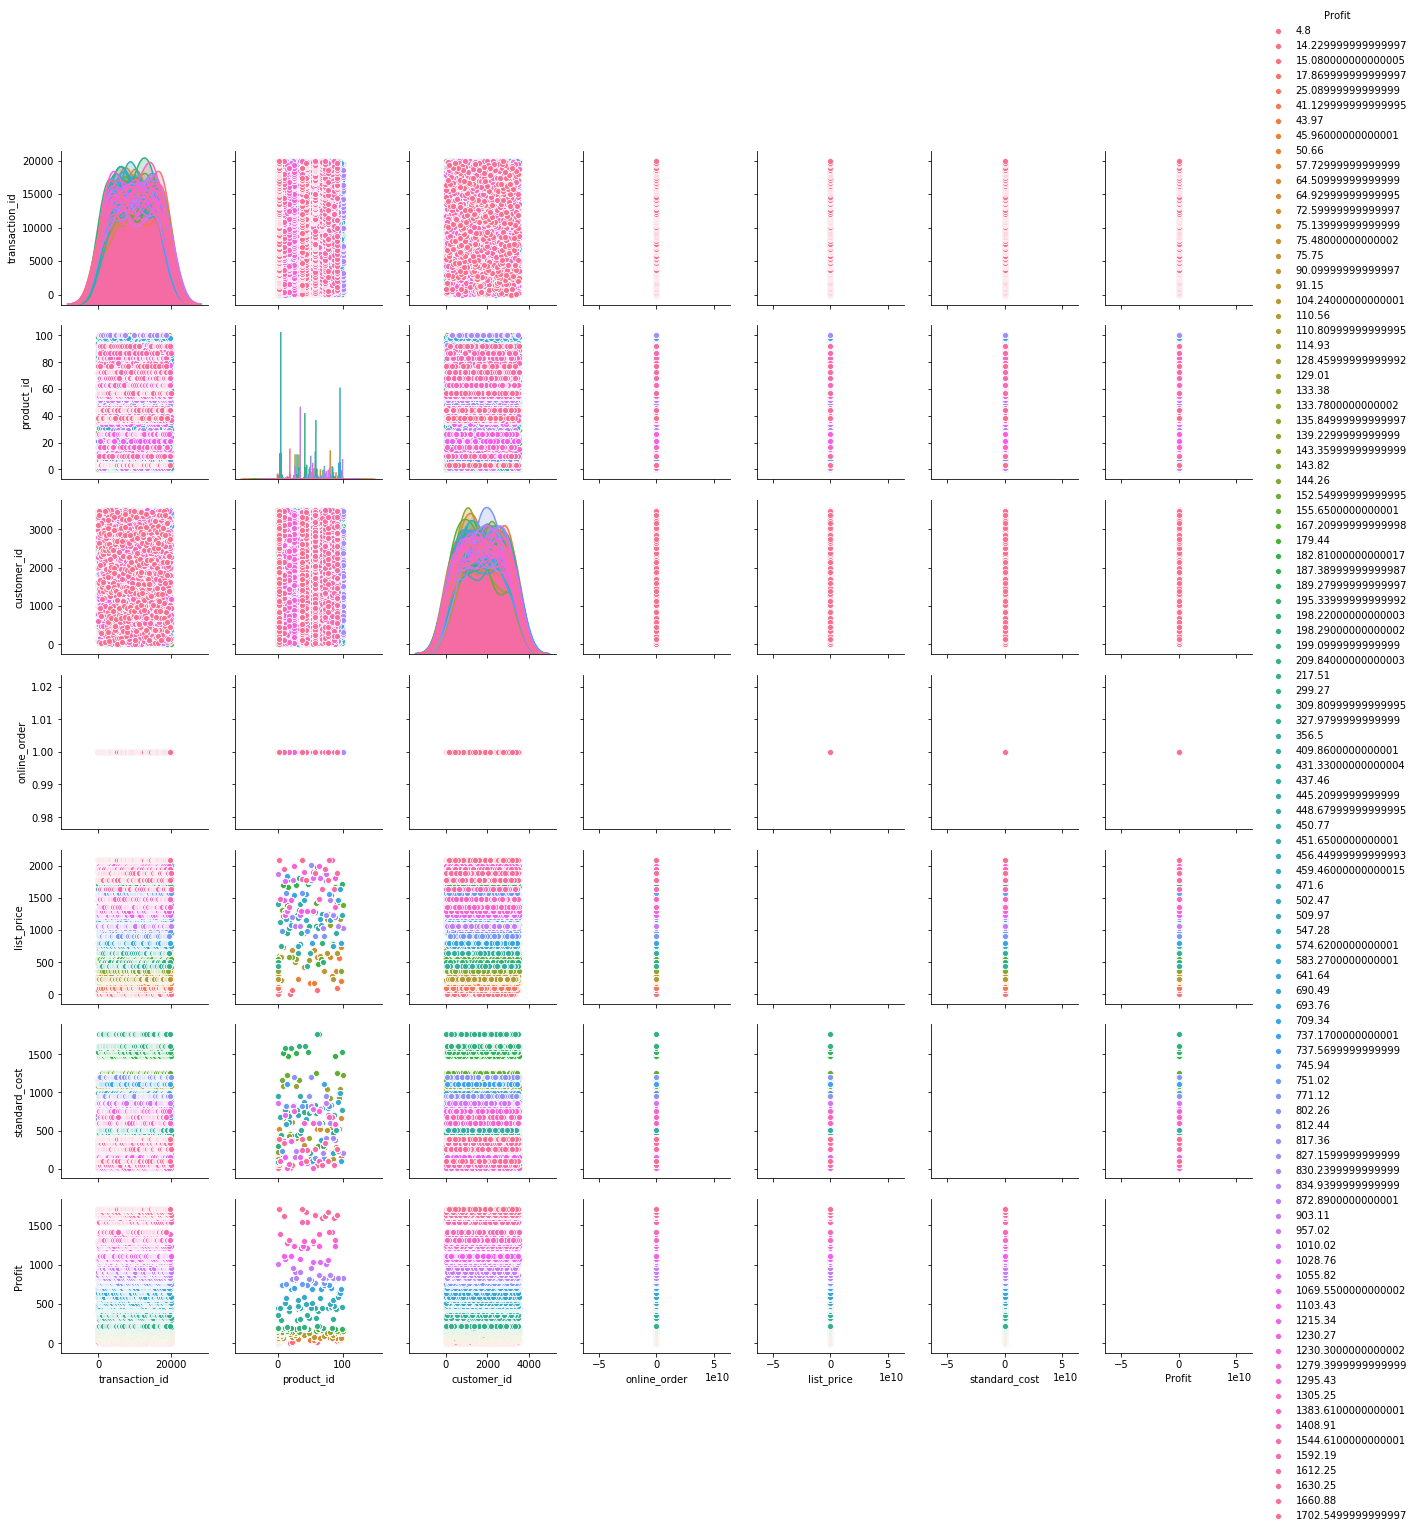

In [10]:
sns.pairplot(transaction, hue="Profit")

In [11]:
# checking for missing values
transaction.isnull().sum()

transaction_id                 0
product_id                     0
customer_id                    0
transaction_date               0
online_order                 360
order_status                   0
brand                        197
product_line                 197
product_class                197
product_size                 197
list_price                     0
standard_cost                197
product_first_sold_date      197
Profit                     10358
dtype: int64

In [ ]:
sns.pairplot(customer_demographic, hue="gender")

C:\Users\jaink\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jaink\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


In [ ]:
sns.pairplot(customer_add, hue="country")

In [ ]:
#using heatmaps to visualise missing data in guven data, to get more insgights of our dataset.

In [ ]:
sns.heatmap(customer_demographic.isnull(),yticklabels=False,cbar=False,cmap='gnuplot2')

In [ ]:
sns.heatmap(customer_add.isnull(),yticklabels=False,cbar=False,cmap='gnuplot2')
#no value is missing, we can perform join using this table, on other tables.

In [ ]:
sns.heatmap(new_customer_lists.isnull(),yticklabels=False,cbar=False,cmap='gnuplot2')
#Values are missing from column "last_name" which is not useful for us. 
#job_industry_category has alot of missing value.

In [ ]:
sns.heatmap(transaction.isnull(),yticklabels=False,cbar=False,cmap='gnuplot2') 
#alot of values from column profit is missing

In [ ]:
transaction

In [ ]:
#lets create some pair plots.

In [ ]:
#We can drop the null value/column , based on factor if we are able to draw some important insight from that column.


In [ ]:
#Checking for duplicate values
duplicate = transaction.duplicated()
transaction[duplicate].sum()

In [ ]:
#we have no duplicate value, as data is cleaned 

In [ ]:
transaction.columns

In [ ]:
transaction['online_order'].value_counts()

In [ ]:
transaction['order_status'].value_counts() #exploring data columns

In [ ]:
transaction['brand'].value_counts()

In [ ]:
#exploring neww_customer_lists
new_customer_lists.head()

In [ ]:
new_customer_lists.describe()

In [ ]:
new_customer_lists.info()

In [ ]:
new_customer_lists.columns

In [ ]:
new_customer_lists['gender'].value_counts()

In [ ]:
new_customer_lists['postcode'].describe()

In [ ]:
#exploring Customer_demographic_dataset
customer_demographic.head()

In [ ]:
#drop age column for now

In [ ]:
customer_demographic.drop(['Age'],axis=1, inplace=True)

In [ ]:
customer_demographic.head()

In [ ]:
#merging information of all three tables into single table
new_customer_lists.head()

new_customer_lists.columns

In [ ]:
#droping unncessary columns
new_customer_lists.drop(['Unnamed: 20','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19'],axis=1,inplace=True)



In [ ]:
#we have to merge customer_id column to new_customer_list to make information visible and complete
customer_demographic['customer_id'].iloc[-1]

In [ ]:
new_customer_lists.head()

In [ ]:
customer_add.head()

In [ ]:
#performing left join on customer demographic data and customer adress data set , joing on customer id
customer_demographic = pd.merge(customer_demographic, customer_add, how='left', on='customer_id')

In [ ]:
customer_demographic.head()

In [ ]:
new_customer_lists.head()

In [ ]:
new_df = pd.concat([customer_demographic, new_customer_lists], ignore_index=True, sort=False)
new_df

In [ ]:

#above is sorted and clean dataset.
#the end